# Unit 12. 베스트 모델 저장하기
### - 이진 분류 - 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### 1. Best Model 저장하고 불러오기

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Callback 설정 - 베스트 모델 저장

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = 'best_model.h5'
mc = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                     save_best_only=True)

- 모델 학습

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50,
                    verbose=1, callbacks=[mc])

Epoch 1/100
1/8 [==>...........................] - ETA: 5s - loss: 0.8323 - accuracy: 0.4400
Epoch 1: val_loss improved from inf to 0.48854, saving model to best_model.h5
8/8 [==============================] - 1s 34ms/step - loss: 0.7180 - accuracy: 0.4973 - val_loss: 0.4885 - val_accuracy: 0.8571
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5116 - accuracy: 0.8200
Epoch 2: val_loss improved from 0.48854 to 0.32092, saving model to best_model.h5
8/8 [==============================] - 0s 8ms/step - loss: 0.4145 - accuracy: 0.9038 - val_loss: 0.3209 - val_accuracy: 0.9231
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.9000
Epoch 3: val_loss improved from 0.32092 to 0.23685, saving model to best_model.h5
8/8 [==============================] - 0s 9ms/step - loss: 0.2777 - accuracy: 0.9313 - val_loss: 0.2369 - val_accuracy: 0.9231
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1995 - accuracy: 0.9600
Epoc

- 베스트 모델 불러오기

In [10]:
from tensorflow.keras.models import load_model

best_model = load_model(modelpath)

- 모델 평가

In [11]:
best_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 1.0000


[0.02640884928405285, 1.0]

### 2. 베스트 모델 저장하고 조기 종료하기

- Dropout layer 추가

In [12]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 조기 종료 조건 설정

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=30)

In [15]:
modelpath2 = 'best_model2.h5'
mc2 = ModelCheckpoint(filepath=modelpath2, monitor='val_loss', verbose=1,
                      save_best_only=True)

In [16]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50,
                      verbose=1, callbacks=[mc2, es])

Epoch 1/100
1/8 [==>...........................] - ETA: 3s - loss: 0.8957 - accuracy: 0.2800
Epoch 1: val_loss improved from inf to 0.49368, saving model to best_model2.h5
8/8 [==============================] - 1s 53ms/step - loss: 0.6922 - accuracy: 0.5357 - val_loss: 0.4937 - val_accuracy: 0.8462
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.7400
Epoch 2: val_loss improved from 0.49368 to 0.34977, saving model to best_model2.h5
8/8 [==============================] - 0s 11ms/step - loss: 0.4594 - accuracy: 0.8242 - val_loss: 0.3498 - val_accuracy: 0.9341
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.9600
Epoch 3: val_loss improved from 0.34977 to 0.26767, saving model to best_model2.h5
8/8 [==============================] - 0s 9ms/step - loss: 0.3359 - accuracy: 0.9093 - val_loss: 0.2677 - val_accuracy: 0.9341
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.9200


In [17]:
best_model2 = load_model(modelpath2)
best_model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 1.0000


[0.028080349788069725, 1.0]

In [18]:
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']
xs2 = np.arange(1,len(y_acc2)+1)        # epoch

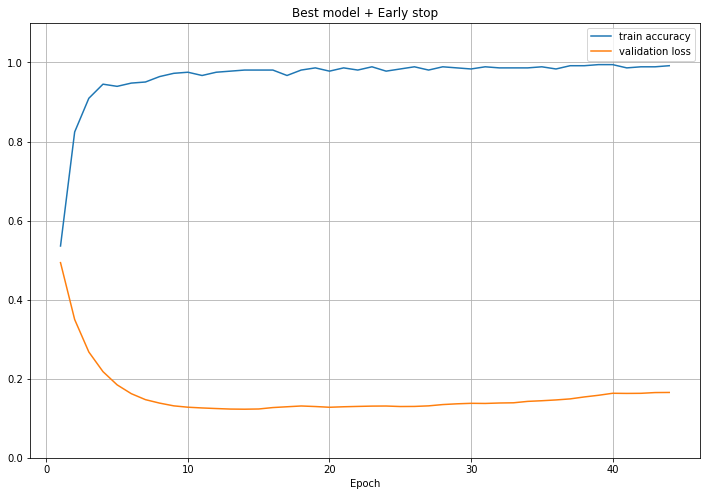

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Best model + Early stop')
plt.show()